In [58]:
import pandas as pd
A = pd.read_csv("C:/Users/tpasv/Desktop/Data Science/Data Science/Project/training_set.csv")
B = pd.read_csv("C:/Users/tpasv/Desktop/Data Science/Data Science/Project/testing_set.csv")

# Data Preprocessing

In [59]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [60]:
replacer(A)
replacer(B)

In [61]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [62]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")

In [63]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [64]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [65]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
import pandas as pd
x = pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [66]:
from pandas import get_dummies
X = x.join(get_dummies(A[cat]))

In [67]:
X.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.45164,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.45164,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


# EDA

In [68]:
import seaborn as sb
import matplotlib.pyplot as plt

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

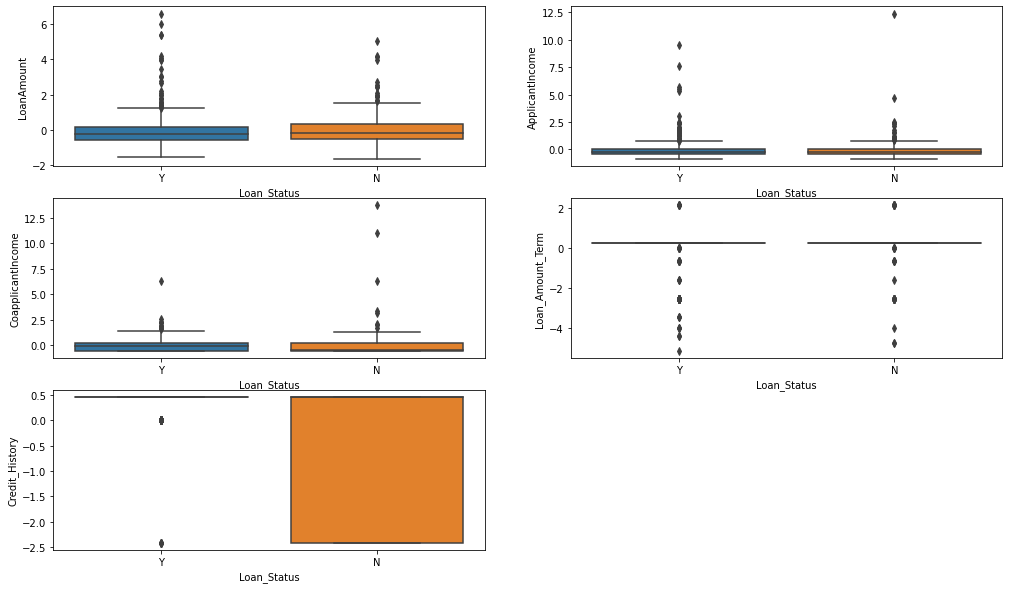

In [69]:
plt.figure(figsize=(17,10))
plt.subplot(3,2,1)
sb.boxplot(A.Loan_Status,X.LoanAmount)
plt.subplot(3,2,2)
sb.boxplot(A.Loan_Status,X.ApplicantIncome)
plt.subplot(3,2,3)
sb.boxplot(A.Loan_Status,X.CoapplicantIncome)
plt.subplot(3,2,4)
sb.boxplot(A.Loan_Status,X.Loan_Amount_Term)
plt.subplot(3,2,5)
sb.boxplot(A.Loan_Status,X.Credit_History)

In [70]:
pd.crosstab(A.Loan_Status,A.Gender)

Gender,Female,Male
Loan_Status,,
N,37,155
Y,75,347


In [71]:
pd.crosstab(A.Loan_Status,A.Married)

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,288


In [72]:
pd.crosstab(A.Loan_Status,A.Dependents)

Dependents,0,1,2,3+
Loan_Status,,,,
N,113,36,25,18
Y,247,66,76,33


In [73]:
pd.crosstab(A.Loan_Status,A.Education)

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


In [74]:
pd.crosstab(A.Loan_Status,A.Self_Employed)

Self_Employed,No,Yes
Loan_Status,,
N,166,26
Y,366,56


In [75]:
pd.crosstab(A.Loan_Status,A.Property_Area)

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


In [76]:
def ANOVA (con,cat,DF):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con+""+"~"+""+cat
    model = ols(rel,DF).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = pd.DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    print("%.40f"%a)

In [77]:
ANOVA("ApplicantIncome","Loan_Status",A)

0.9025179321924293729395571972418110817671


In [78]:
ANOVA("CoapplicantIncome","Loan_Status",A)

0.1423903217924775976843676517091807909310


In [79]:
ANOVA("LoanAmount","Loan_Status",A)

0.3676876450819257513558113714680075645447


In [80]:
ANOVA("Loan_Amount_Term","Loan_Status",A)

0.6039634092405201659659041979466564953327


In [81]:
ANOVA("Credit_History","Loan_Status",A)

0.0000000000000000000000000000000000000000


# Creating Model for Training Data

In [82]:
Y = A[["Loan_Status"]]

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=8)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
accuracy_score(ytest,pred)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8861788617886179

In [84]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=8)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8862


In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=8)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11,max_leaf_nodes=2)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8862


In [86]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=8)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11,max_leaf_nodes=7,n_estimators=10)
model = rfc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8862


<ipython-input-86-5bfc696d7172>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=8)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2,random_state=14)
abc = AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model = abc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8862


G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X = C.join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=8)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
model = knc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8618


<ipython-input-88-dfb720518108>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = knc.fit(xtrain,ytrain)


In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2,random_state=14)
abc = AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model = abc.fit(X,Y)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Testing Data on Model

In [90]:
cat = []
con = []
for i in B.columns:
    if(B[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [91]:
cat.remove("Loan_ID")

In [92]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
import pandas as pd
t = pd.DataFrame(st.fit_transform(B[con]),columns=con)

In [93]:
from pandas import get_dummies
T = t.join(get_dummies(B[cat]))

In [94]:
T.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [95]:
B['Loan_Status']= pd.DataFrame(model.predict(T))

# Predicted Loan Status on given data

In [96]:
B.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


# Creating Model to predict loan amount for people who rejected for loan

In [97]:
T['Loan_Status']= pd.DataFrame(model.predict(T))

In [98]:
NE = T[T.Loan_Status=="N"]
NE = NE.drop(labels=["Loan_Status","LoanAmount"],axis=1)

In [99]:
E = T[T.Loan_Status=="Y"]

In [100]:
E

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,Y
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,Y
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,Y
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,1,1,0,1,...,0,0,0,1,1,0,0,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Y
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
364,-0.317211,0.181644,-0.166482,0.270603,0.00000,0,1,1,0,1,...,0,0,1,0,1,0,0,1,0,Y
365,0.039641,0.353241,0.359289,0.270603,0.47918,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,Y


In [101]:
Y = E[["LoanAmount"]]
X = E.drop(labels=["LoanAmount","Loan_Status"],axis=1)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtc1 = DecisionTreeRegressor(max_depth=2,random_state=14)
abc = AdaBoostRegressor(dtc1,random_state=228,n_estimators=2)
model = abc.fit(X,Y)

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [115]:
model.predict(NE)

array([-0.26577253,  0.79291951, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253,  0.79291951,  0.79291951, -0.26577253,  0.79291951,
        0.79291951, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
        0.79291951, -0.26577253, -0.26577253,  0.79291951, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253, -0.26577253,
        0.79291951,  0.79291951, -0.26577253, -0.26577253,  0.79291951,
       -0.26577253,  0.79291951, -0.26577253, -0.26577253, -0.26577253,
       -0.26577253, -0.26577253, -0.26577253, -0.26577253])